Mounted at /content/drive
1/1 [==============================] - 0s 91ms/step
Training Bernoulli Naive Bayes for EfficientNetB0...
Performance metrics for Bernoulli Naive Bayes with EfficientNetB0:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



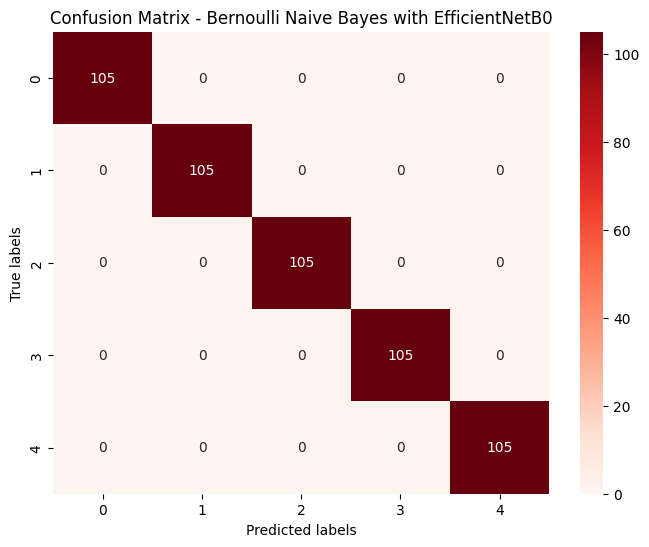

Training Multinomial Naive Bayes for EfficientNetB0...
Performance metrics for Multinomial Naive Bayes with EfficientNetB0:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       105
           1       0.35      0.63      0.45       105
           2       0.44      0.28      0.34       105
           3       0.53      0.36      0.43       105
           4       0.46      0.61      0.53       105

    accuracy                           0.45       525
   macro avg       0.48      0.45      0.44       525
weighted avg       0.48      0.45      0.44       525

Accuracy: 0.44761904761904764
Sensitivity: 0.44761904761904764
Precision: 0.47779062919315374
F1 Score: 0.4402595977240405



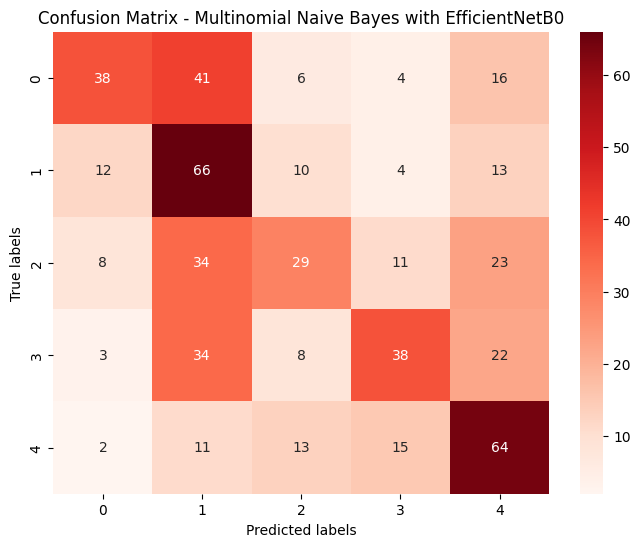

Training Complement Naive Bayes for EfficientNetB0...
Performance metrics for Complement Naive Bayes with EfficientNetB0:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.34      0.44       105
           1       0.32      0.62      0.42       105
           2       0.78      0.07      0.12       105
           3       0.49      0.31      0.38       105
           4       0.38      0.69      0.49       105

    accuracy                           0.41       525
   macro avg       0.52      0.41      0.37       525
weighted avg       0.52      0.41      0.37       525

Accuracy: 0.4057142857142857
Sensitivity: 0.4057142857142857
Precision: 0.5193962591582849
F1 Score: 0.37234530933784854



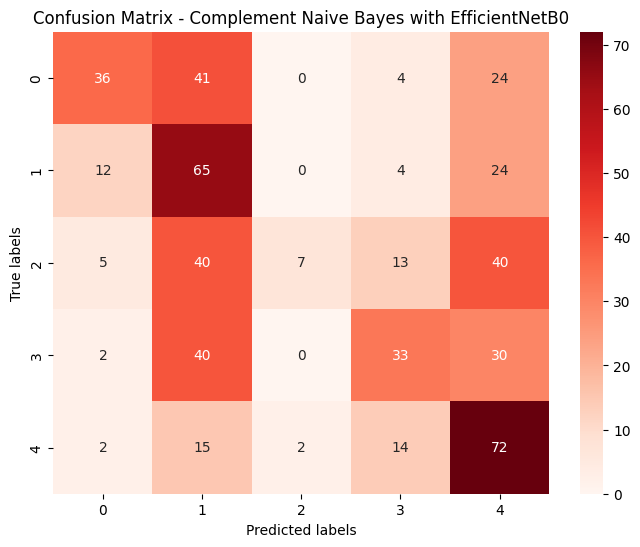

Training Gaussian Naive Bayes for EfficientNetB0...
Performance metrics for Gaussian Naive Bayes with EfficientNetB0:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       105
           1       0.55      0.96      0.70       105
           2       0.90      0.67      0.77       105
           3       0.94      0.73      0.82       105
           4       0.85      0.87      0.86       105

    accuracy                           0.78       525
   macro avg       0.83      0.78      0.78       525
weighted avg       0.83      0.78      0.78       525

Accuracy: 0.7771428571428571
Sensitivity: 0.7771428571428571
Precision: 0.8299534738373172
F1 Score: 0.7826621984093146



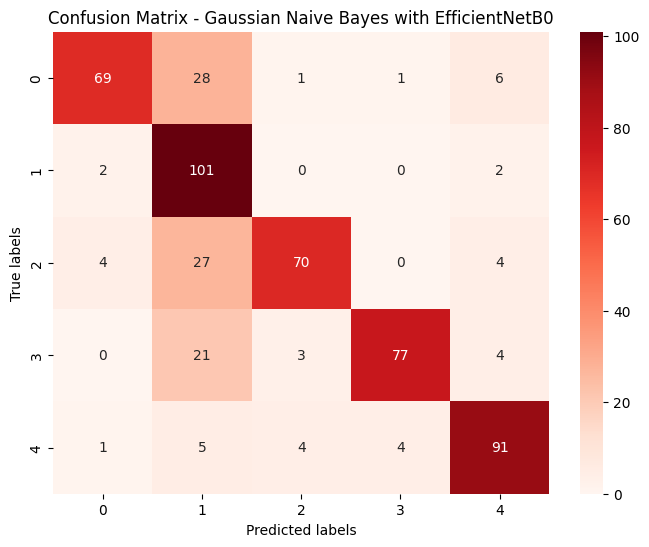

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# EfficientNetB0
model_b0 = EfficientNetB0(weights='imagenet', include_top=False)

# Function to extract features from an image using EfficientNetB0
def extract_features_efficientnet_b0(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b0.predict(img_data)
    return features

# Load images and extract features for B0
x_train_b0, y_train_b0 = [], []
x_test_b0, y_test_b0 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b0(os.path.join(class_dir, img_path))
        x_train_b0.append(features)
        y_train_b0.append(i)

# Load images and extract features for B0
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b0(os.path.join(class_dir, img_path))
        x_test_b0.append(features)
        y_test_b0.append(i)

# Flatten the features for B0
x_train_flat_b0 = np.array([feature.flatten() for feature in x_train_b0])
x_test_flat_b0 = np.array([feature.flatten() for feature in x_test_b0])

# Scale the input features to the range [0, 1] for B0
scaler_b0 = MinMaxScaler()
x_train_scaled_b0 = scaler_b0.fit_transform(x_train_flat_b0)
x_test_scaled_b0 = scaler_b0.transform(x_test_flat_b0)

# Ensure non-negative values for B0
min_value_b0 = np.min(np.concatenate([x_train_scaled_b0, x_test_scaled_b0]))
x_train_scaled_non_negative_b0 = x_train_scaled_b0 - min_value_b0
x_test_scaled_non_negative_b0 = x_test_scaled_b0 - min_value_b0

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for B0
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for EfficientNetB0...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b0, y_train_b0)
    # Predict on test set
    y_pred_b0 = clf.predict(x_test_scaled_non_negative_b0)
    # Print performance metrics for B0
    print(f'Performance metrics for {clf_name} with EfficientNetB0:')
    print('Classification Report:')
    print(classification_report(y_test_b0, y_pred_b0))
    # Additional performance metrics
    accuracy_b0 = metrics.accuracy_score(y_test_b0, y_pred_b0)
    sensitivity_b0 = metrics.recall_score(y_test_b0, y_pred_b0, average='macro')
    precision_b0 = metrics.precision_score(y_test_b0, y_pred_b0, average='macro')
    f1_b0 = metrics.f1_score(y_test_b0, y_pred_b0, average='macro')
    print(f'Accuracy: {accuracy_b0}')
    print(f'Sensitivity: {sensitivity_b0}')
    print(f'Precision: {precision_b0}')
    print(f'F1 Score: {f1_b0}\n')
    # Plot confusion matrix
    cm_b0 = confusion_matrix(y_test_b0, y_pred_b0)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b0, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB0')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
